In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [9]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

fit_transform을 사용할때 feature들의 헤더가 들어가면 안되는 것인가?
들어가도 자동으로 걸러주는 것이 있고 아닌 것이 있는가?

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf_pred = lr_clf.predict(X_test)

print('accuracy:{:.3f}'.format(accuracy_score(y_test, lr_clf_pred)))
print('rou_auc_score:{:.3f}'.format(roc_auc_score(y_test, lr_clf_pred)))

accuracy:0.977
rou_auc_score:0.972


In [13]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {
    'penalty':['l2','l1'],
    'C':[0.01, 0.1, 1, 5, 10]
}

grid_lr_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_lr_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{}, 최적 평균 정확도:{:3f}'.format(grid_lr_clf.best_params_, grid_lr_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975392


In [18]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [31]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_features = boston_df.drop('PRICE', axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_features, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.round(np.mean(rmse_scores),2)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE: {:3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores:  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE: 4.420000


In [42]:
def get_model_cv_prediction(model, X_features, y_target):
    neg_mse_scores = cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

XGBRegressor을 할때 파라미터에다가 objective ='reg:squarederror 를 넣어야 에러가 나지 않는다. 왜 그럴까?

In [45]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(objective ='reg:squarederror', n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgbm_reg]
for model in models:
    get_model_cv_prediction(model, X_features, y_target)

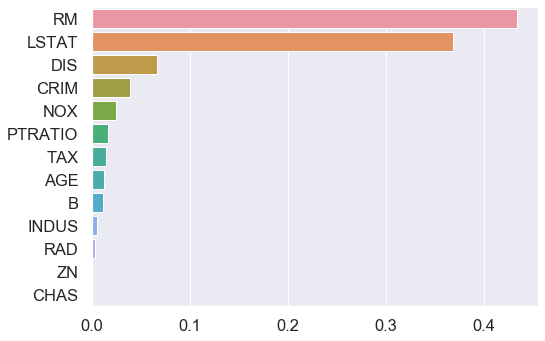

In [52]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_features, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_features.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

주된 feature인 RM을 가지고 PRICE예측 시각화

(100, 2)


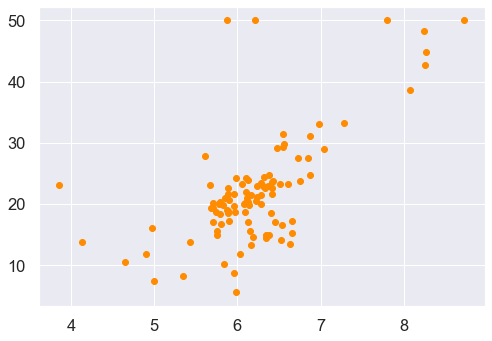

In [53]:
boston_df_sample = boston_df[['RM', 'PRICE']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample['RM'], boston_df_sample['PRICE'], c='darkorange')

In [54]:
from sklearn.linear_model import LinearRegression

In [57]:
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = boston_df_sample['RM'].values.reshape(-1,1)
y_target = boston_df_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

lr_reg_pred = lr_reg.predict(X_test)
rf_reg2_pred = rf_reg2.predict(X_test)
rf_reg7_pred = rf_reg7.predict(X_test)

In [60]:
X_test[:5,:]

array([[4.5 ],
       [4.54],
       [4.58],
       [4.62],
       [4.66]])

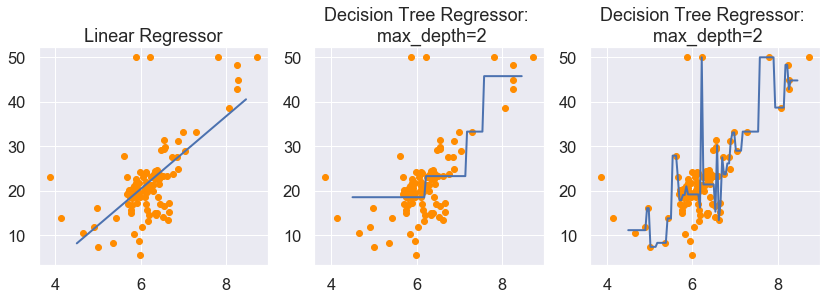

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,4))

ax1.set_title('Linear Regressor')
ax1.scatter(boston_df_sample['RM'], boston_df_sample['PRICE'], c='darkorange')
ax1.plot(X_test, lr_reg_pred, label="linear", linewidth=2)

ax2.set_title('Decision Tree Regressor: \n max_depth=2')
ax2.scatter(boston_df_sample['RM'], boston_df_sample['PRICE'], c='darkorange')
ax2.plot(X_test, rf_reg2_pred, label='linear',linewidth=2)

ax3.set_title("Decision Tree Regressor: \n max_depth=2")
ax3.scatter(boston_df_sample['RM'], boston_df_sample['PRICE'], c="darkorange")
ax3.plot(X_test, rf_reg7_pred,label='linear', linewidth=2)